In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [2]:
# Leer datos de parquimetros del Q2 de 2021
parq = pd.read_csv("2021T2-SER-uso-parquimetros.csv",delimiter = ';',decimal = ',') 



In [53]:
# Nº de compras de tique
parq.shape

(11328103, 14)

In [3]:
# Eliminar la hora de la fecha de operación y convertir a formato datetime
parq['fecha_operacion']=parq['fecha_inicio'].str[0:10]
parq['fecha_operacion'] = pd.to_datetime(parq['fecha_operacion'], format="%Y/%m/%d")


In [4]:
# Analizar evolución de ingresos por día
parq_fecha = parq.\
    groupby('fecha_operacion')['importe_tique'].sum().reset_index()
parq_fecha.set_index('fecha_operacion',inplace=True)


In [5]:
# Añadir dias sin ventas de tiques

# creamos variable parq_f en todo el rango de fechas del Q con los importes a cero
parq_f= pd.DataFrame(index=pd.date_range(start="2021-04-01",end="2021-06-30"))
parq_f['importe_tique']=0

# Le añadimos los importes de los dias en que ha habido ventas
rows = parq_fecha.index
parq_f.loc[parq_f.index.intersection(rows)]=parq_fecha


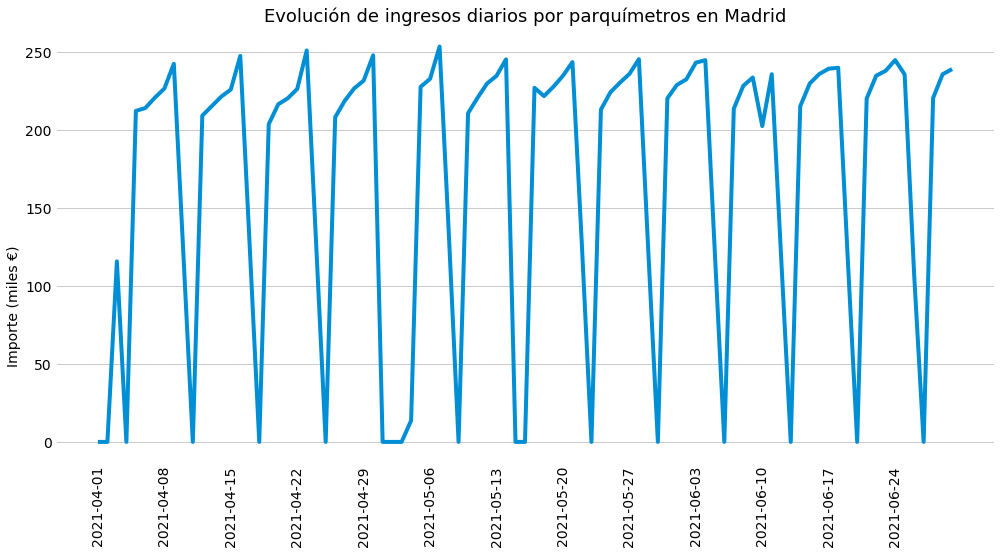

In [37]:
# Visualizar la evolucion de ingresos por día
x = parq_f.index
y = parq_f['importe_tique']/1000
plt.plot(x, y,lw = 4, ls='-', alpha=1, color=sns.color_palette()[0])

plt.grid(axis='y') 
plt.xticks(x[::7], rotation=90)

#plt.legend()
plt.ylabel('Importe (miles €)', rotation=90, ha = 'right')

plt.title('Evolución de ingresos diarios por parquímetros en Madrid',fontsize= 18)
plt.savefig('images/evol_ingresos_diarios.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()


In [7]:
# Ver evolucion de los ingresos medios por día de la semana
parq_fecha['day_week'] = parq_fecha.index.weekday

# Calculamos la media por día de la semana
parq_weekday = parq_fecha.groupby('day_week')['importe_tique'].mean().reset_index()
parq_weekday

,day_week,importe_tique
0,0,214349.337500
1,1,207713.065385
2,2,229331.973077
3,3,213646.373077
4,4,244195.541667
5,5,120755.281818


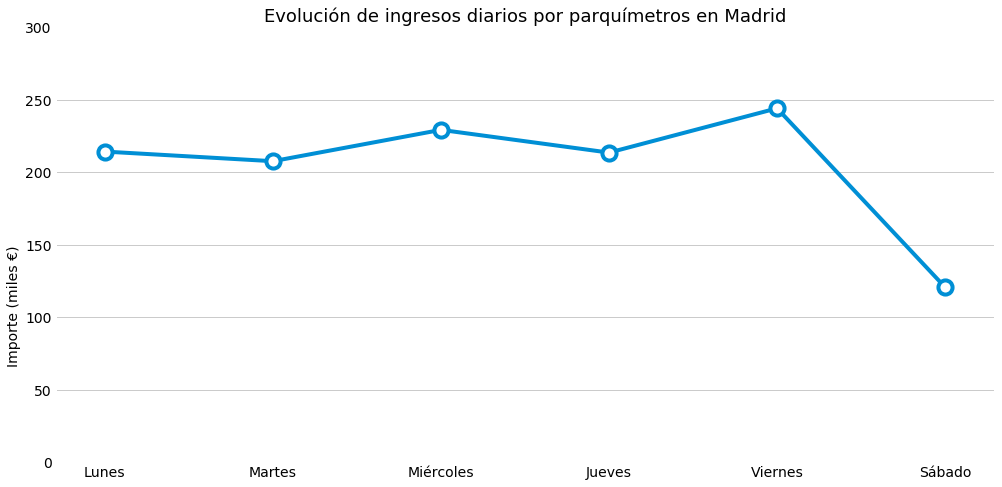

In [38]:
# Visualizar la evolucion de ingresos por día de la semana
x = parq_weekday['day_week']
y = parq_weekday['importe_tique']/1000
plt.plot(x, y,lw = 4, ls='-',  color=sns.color_palette()[0],zorder=10)
plt.scatter(x, y, s = 200, lw= 4, marker = 'o', color=sns.color_palette()[0],fc='w',zorder=12)

plt.grid(axis='y') 

#plt.legend()
plt.ylabel('Importe (miles €)', rotation=90, ha = 'right')
plt.ylim(0, 300)
xlabels = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado']
plt.xticks(x, xlabels)

plt.title('Evolución de ingresos diarios por parquímetros en Madrid',fontsize= 18)
plt.savefig('images/evol_ingresos_diarios_medios.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [9]:
#Crea variable para saber si pago ha sido por app o en parquímetro físico
parq['app'] = parq['matricula_parquimetro'].apply(lambda x: 1 if x == 'APP-MOVIL' else 0)

# Analizar los ingresos por App y por parquímetro
pagos_app = parq.\
    groupby('app')['importe_tique'].sum().reset_index()
pago_app    = pagos_app.loc[1,'importe_tique']
pago_parqui = pagos_app.loc[0,'importe_tique']

# Analizar las operaciones por App y por parquímetro
ops_app = parq.\
    groupby('app')['importe_tique'].count().reset_index()
op_app    = ops_app.loc[1,'importe_tique']
op_parqui = ops_app.loc[0,'importe_tique']


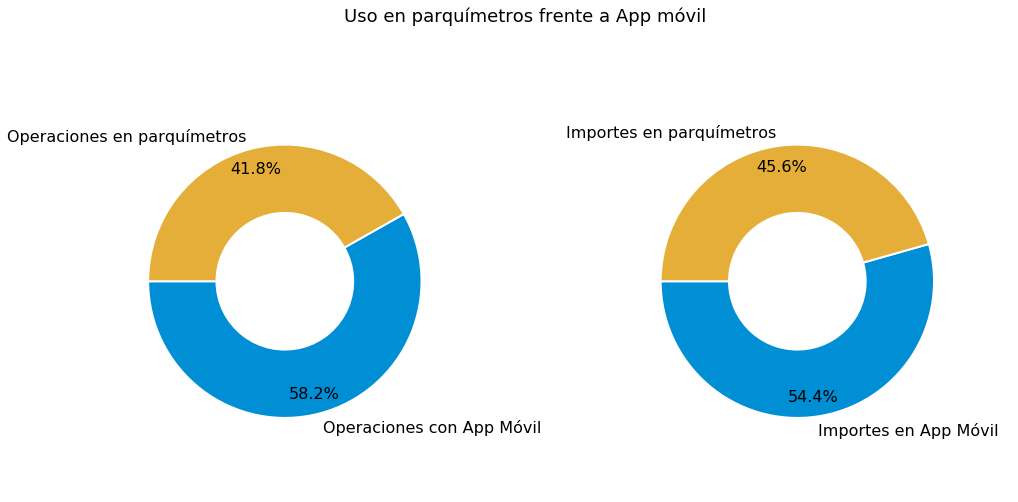

In [39]:
# Crear dos pie charts 
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Uso en parquímetros frente a App móvil',fontsize= 18)

#colors
colors = [sns.color_palette()[0],sns.color_palette()[2]]

# Pie chart de distribución de operaciones entre App y parquímetros
labels = ['Operaciones con App Móvil', 'Operaciones en parquímetros']
sizes = [op_app, op_parqui]
 
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=180, pctdistance=0.85,
        textprops={'fontsize': 16},radius = 0.8, wedgeprops={"edgecolor":"w",'linewidth':2, "width" :0.4}) 

# Pie chart de distribución de ingresos entre App y parquímetros
labels = ['Importes en App Móvil', 'Importes en parquímetros']
sizes = [pago_app, pago_parqui]

ax2.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=180, pctdistance=0.85,
        textprops={'fontsize': 16},radius = 0.8, wedgeprops={"edgecolor":"w",'linewidth':2, "width" :0.4})

plt.savefig('images/ratio_app.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

In [36]:
# Cuantos parquímetros hay en Madrid
parq['matricula_parquimetro'].nunique()

3886

In [11]:
# Diferencias entre distritos

pagos_distrito = parq.\
    groupby('distrito')['importe_tique'].sum().reset_index()
pagos_distrito.sort_values(by=['importe_tique'],inplace=True)
pagos_distrito

,distrito,importe_tique
1,CENTRO,3.320843e+05
4,FUENCARRAL,5.663950e+05
5,MONCLOA,9.639148e+05
0,ARGANZUELA,1.686113e+06
8,TETUAN,1.708664e+06
6,RETIRO,1.871270e+06
7,SALAMANCA,2.327084e+06
3,CHAMBERI,2.445778e+06
2,CHAMARTIN,3.388531e+06


In [41]:
# Ingresos por zonas azul y verde
parq2 = parq[parq['tipo_zona'].isin(['AZUL','VERDE'])]
pagos_zona = parq2.\
    groupby('tipo_zona')['importe_tique'].sum().reset_index()

pago_azul = pagos_zona[pagos_zona['tipo_zona']=='AZUL']['importe_tique'].to_numpy()
pago_verde = pagos_zona[pagos_zona['tipo_zona']=='VERDE']['importe_tique'].to_numpy()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


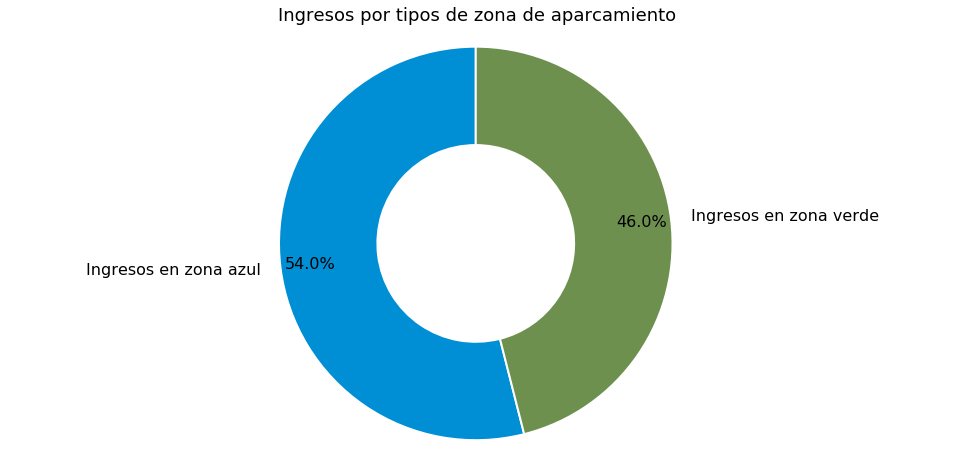

In [42]:
# Crear pie chart

#colors
colors = [sns.color_palette()[0],sns.color_palette()[3]]

# Pie chart de distribución de operaciones entre App y parquímetros
labels = ['Ingresos en zona azul', 'Ingresos en zona verde']
sizes = [np.array(pagos_zona['importe_tique'])]
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, 
        textprops={'fontsize': 16},radius = 0.8, wedgeprops={"edgecolor":"w",'linewidth':2, "width" :0.4})
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Ingresos por tipos de zona de aparcamiento',fontsize= 18)
plt.savefig('images/ratio_ingresos_zonas.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

In [43]:
# Ingresos por distrito y zonas azul y verde
pagos_zona = parq2.\
    groupby(['distrito','tipo_zona'])['importe_tique'].sum().reset_index()

pagos_zona_pivot = pagos_zona.pivot(index='distrito', columns='tipo_zona')['importe_tique'].reset_index()
pagos_zona_pivot

tipo_zona,distrito,AZUL,VERDE
0,ARGANZUELA,1.040564e+06,645548.45
1,CENTRO,7.500000e-01,284621.30
2,CHAMARTIN,2.079432e+06,1309099.75
3,CHAMBERI,1.347452e+06,1098326.55
4,FUENCARRAL,2.150659e+05,282637.45
5,MONCLOA,4.613608e+05,300876.00
6,RETIRO,9.712011e+05,900069.20
7,SALAMANCA,9.580884e+05,1368994.50
8,TETUAN,1.005510e+06,703154.75


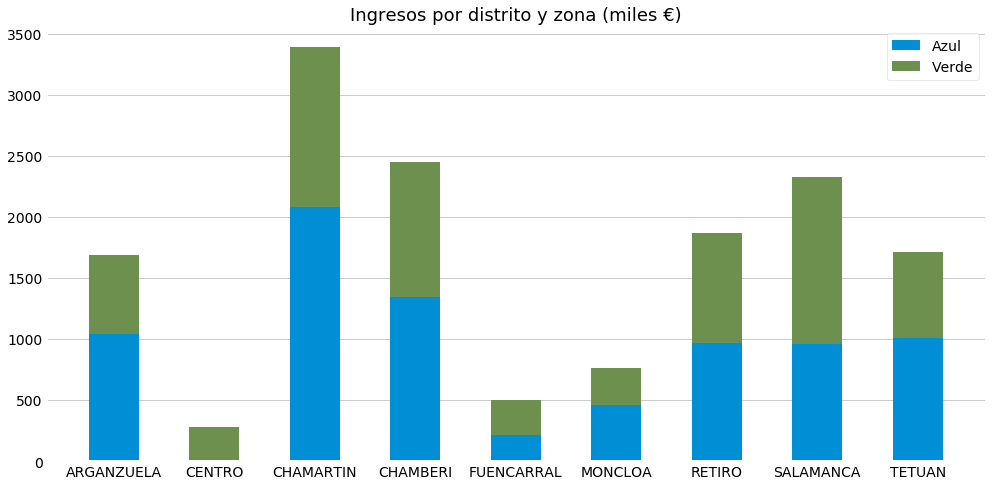

In [44]:
# dibujar Ingresos por distrito y zonas azul y verde

x = pagos_zona_pivot['distrito']
y1 = pagos_zona_pivot['AZUL']/1000
y2 = pagos_zona_pivot['VERDE']/1000

plt.bar(x, y1, alpha=1, color=sns.color_palette()[0], label = 'Azul'
        ,width=0.5)
plt.bar(x, y2, alpha=1, color=sns.color_palette()[3], bottom = y1, label = 'Verde'
        ,width=0.5)

plt.xticks(x,rotation = 0)
plt.grid(axis='y')
plt.legend()
plt.title('Ingresos por distrito y zona (miles €)',fontsize= 18)
plt.savefig('images/ingresos_distrito.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [16]:
# Calcular número de plazas por distrito y zona
plazas = pd.read_csv("calles_SER_2021.csv",delimiter = ';') 

# Eliminar códigos previos del distrito
plazas['distrito'] = plazas['distrito'].map(lambda x: str(x)[4:])

# Eliminar tildes
a,b = 'ÁÍ','AI'
trans = str.maketrans(a,b)
plazas['distrito'] = plazas['distrito'].map(lambda x: x.translate(trans))

# Eliminar texto tras '-'
sep = '-'
plazas['distrito'] = plazas['distrito'].map(lambda x: x.split(sep, 1)[0])

In [17]:
# Plazas por distrito y zonas azul y verde
plazas_distrito = plazas.\
    groupby(['distrito','color'])['num_plazas'].sum().reset_index()

plazas_pivot = plazas_distrito.pivot(index='distrito', columns='color')['num_plazas'].reset_index()
plazas_pivot.drop(columns=['Naranja', 'Rojo'], inplace = True)
plazas_pivot

color,distrito,Azul,Verde
0,ARGANZUELA,3835.0,15557.0
1,CENTRO,NaN,7989.0
2,CHAMARTIN,6069.0,24284.0
3,CHAMBERI,2731.0,13257.0
4,FUENCARRAL,1146.0,11479.0
5,MONCLOA,1335.0,7261.0
6,RETIRO,2158.0,12713.0
7,SALAMANCA,2743.0,15219.0
8,TETUAN,2554.0,15496.0


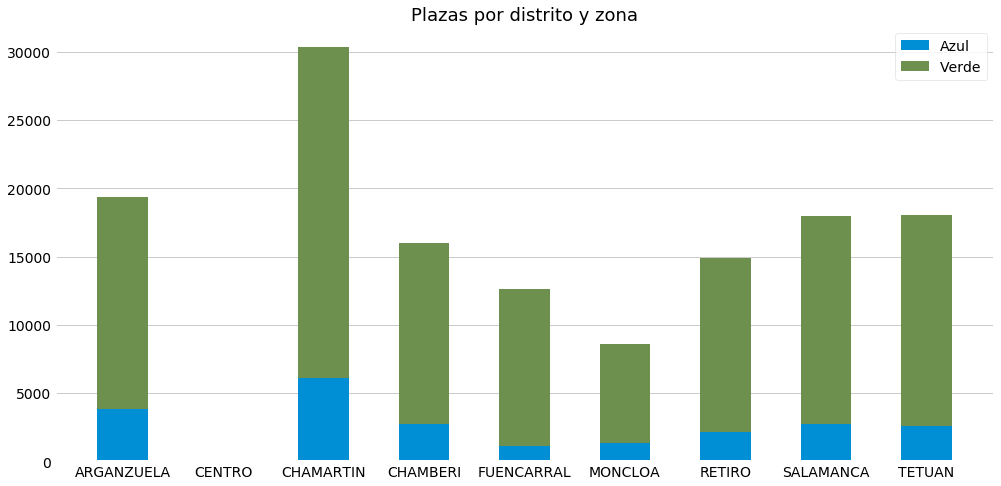

In [45]:
# dibujar plazas por distrito y zonas azul y verde

x = plazas_pivot['distrito']
y1 = plazas_pivot['Azul']
y2 = plazas_pivot['Verde']

plt.bar(x, y1, alpha=1, color=sns.color_palette()[0], label = 'Azul'
        ,width=0.5)
plt.bar(x, y2, alpha=1, color=sns.color_palette()[3], bottom = y1, label = 'Verde'
        ,width=0.5)

plt.xticks(x,rotation = 0)
plt.grid(axis='y')
plt.legend()
plt.title('Plazas por distrito y zona',fontsize= 18)
plt.savefig('images/plazas_distrito.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [47]:
# Total de plazas azules y verdes
print ("Total de plazas azules: ", plazas_pivot['Azul'].sum())
print ("Total de plazas verdes: ", plazas_pivot['Verde'].sum())

Total de plazas azules:  22571.0
Total de plazas verdes:  123255.0


In [48]:
# Ingresos por plaza en cada distrito

#Primero unimos las tablas de ingresos y plazas
pagos_zona_pivot = pd.merge(pagos_zona_pivot, plazas_pivot)
pagos_zona_pivot['ing_azul']=pagos_zona_pivot['AZUL']/pagos_zona_pivot['Azul']
pagos_zona_pivot['ing_verde']=pagos_zona_pivot['VERDE']/pagos_zona_pivot['Verde']
pagos_zona_pivot = pagos_zona_pivot.fillna(0)

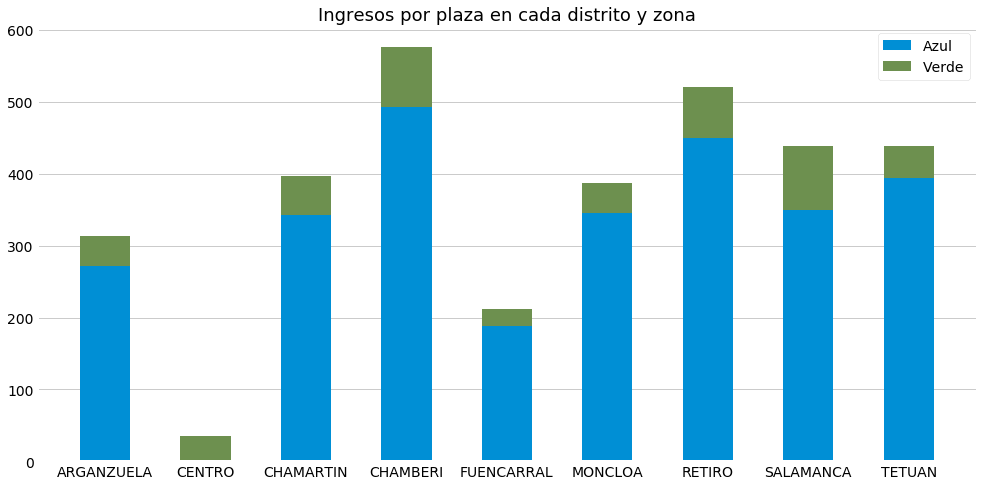

In [49]:
# dibujar  ingresos por plaza por distrito y zonas azul y verde

x = pagos_zona_pivot['distrito']
y1 = pagos_zona_pivot['ing_azul']
y2 = pagos_zona_pivot['ing_verde']

plt.bar(x, y1, alpha=1, color=sns.color_palette()[0], label = 'Azul'
        ,width=0.5)
plt.bar(x, y2, alpha=1, color=sns.color_palette()[3], bottom = y1, label = 'Verde'
        ,width=0.5)

plt.xticks(x,rotation = 0)
plt.grid(axis='y')
plt.legend()
plt.title('Ingresos por plaza en cada distrito y zona',fontsize= 18)
plt.savefig('images/ingresos_plaza_distrito.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [22]:
# Análisis de compras de tiques por tramo horario

parq['hora_inicio']= pd.to_datetime(parq['fecha_inicio'])
parq['hora_inicio']= parq['hora_inicio'].map(lambda x: x.hour)

parq_horas = parq.\
    groupby(['hora_inicio'])['importe_tique'].count().reset_index()
parq_horas['Percentage'] = 100 * parq_horas['importe_tique']/parq_horas['importe_tique'].sum()

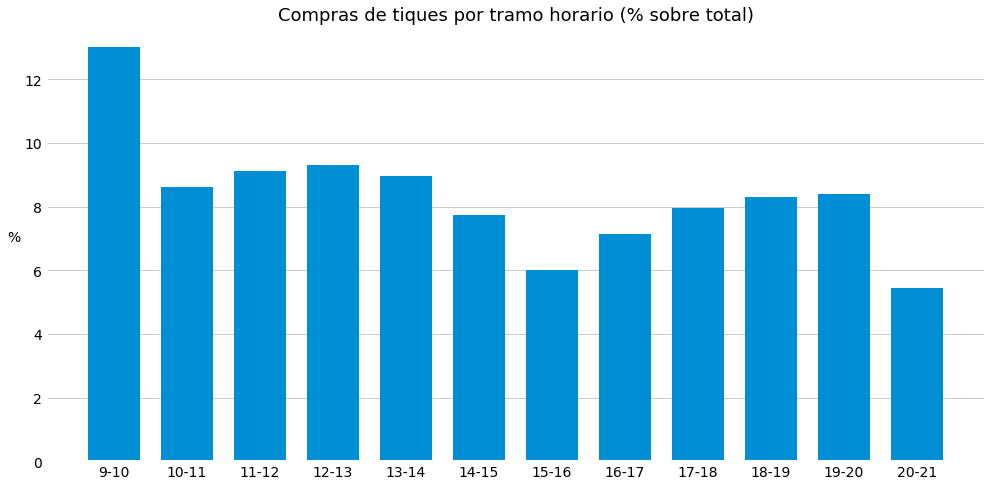

In [50]:
# dibujar  % de compras de tique por tramo horario

x = parq_horas['hora_inicio']
y = parq_horas['Percentage']

plt.bar(x, y, alpha=1, color=sns.color_palette()[0],width=0.7)

xlabels = ['9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21']
plt.xticks(x,xlabels)
plt.grid(axis='y')
plt.ylabel('%', rotation=0, ha = 'right')

plt.title('Compras de tiques por tramo horario (% sobre total)',fontsize= 18)
plt.savefig('images/tiques_tramo_horario.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [24]:
# Volumen de ocupación de plazas

# Total de entradas por fecha
entradas = pd.DataFrame()
entradas['fecha']= parq['fecha_inicio']
entradas['entrada_salida']= 1

# Total de salidas por fecha
salidas = pd.DataFrame()
salidas['fecha']= parq['fecha_fin']
salidas['entrada_salida']= -1

# Unimos las dos tablas
frames = [entradas, salidas]
ent_sal = pd.concat(frames)
ent_sal.sort_values(by=['fecha'], inplace=True)

# Calculamos valores acumulados
ent_sal['acum']= ent_sal['entrada_salida'].cumsum()

In [25]:
# Analisis de dos días de la semana
ent_sal['fecha_operacion'] = ent_sal['fecha'].str[0:10]
ent_sal['fecha_operacion'] = pd.to_datetime(ent_sal['fecha_operacion'], format="%Y/%m/%d")

# datos de un jueves
ent_sal2 = ent_sal[ent_sal['fecha_operacion'] == '2021-04-08']
# Nos quedamos con una fila de cada 100, para no sobrecargar el gráfico
ent_sal2 = ent_sal2.iloc[::100]

# datos de un viernes
ent_sal3 = ent_sal[ent_sal['fecha_operacion'] == '2021-04-09']
# Nos quedamos con una fila de cada 100, para no sobrecargar el gráfico
ent_sal3 = ent_sal3.iloc[::100]

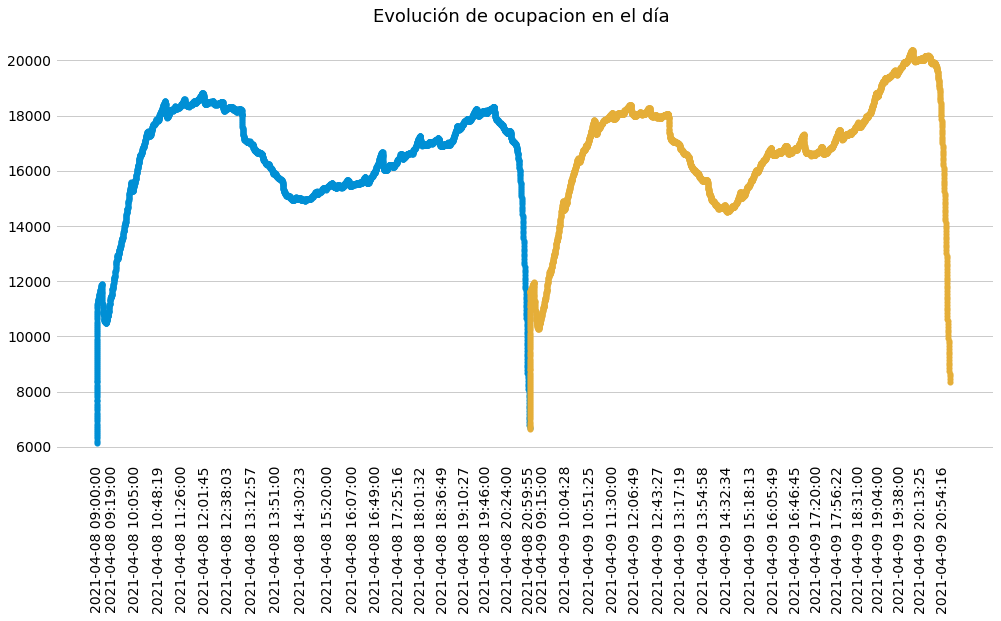

In [51]:
# Visualizar la evolucion de ocupacion del jueves y viernes
x1 = ent_sal2['fecha']
y1 = ent_sal2['acum']
plt.scatter(x1, y1, lw = 0.1, color=sns.color_palette()[0])

# Visualizar la evolucion de ocupacion del miércoles
x2 = ent_sal3['fecha']
y2 = ent_sal3['acum']
plt.scatter(x2, y2, lw = 0.1, color=sns.color_palette()[2])

plt.grid(axis='y') 
x = x1.append(x2)
plt.xticks(x[::180], rotation=90)


#plt.legend()
#plt.ylabel('Importe (miles €)', rotation=90, ha = 'right')

plt.title('Evolución de ocupacion en el día ',fontsize= 18)
plt.savefig('images/evol_ocupacion.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()



In [31]:
# Ocupación máxima por día
ent_sal_max = ent_sal.\
    groupby(['fecha_operacion'])['acum'].max().reset_index()
ent_sal_max = ent_sal_max[:-1]
ent_sal_max

,fecha_operacion,acum
0,2021-04-03,21527
1,2021-04-05,17934
2,2021-04-06,18502
3,2021-04-07,18340
4,2021-04-08,18826
...,...,...
68,2021-06-25,19724
69,2021-06-26,18007
70,2021-06-28,18716
71,2021-06-29,19238


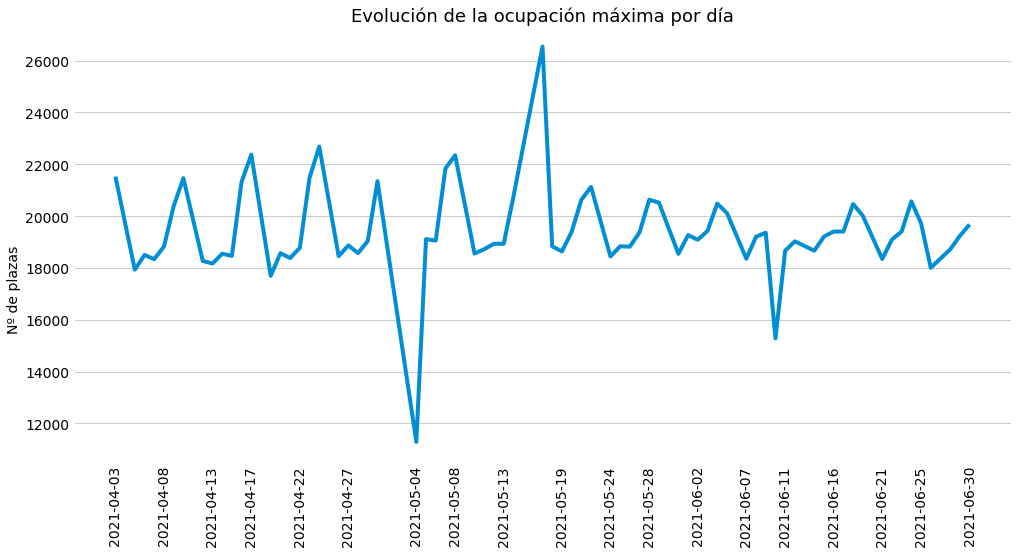

In [52]:
# Visualizar la ocupación máxima por día
x = ent_sal_max['fecha_operacion']
y = ent_sal_max['acum']

plt.plot(x, y,lw = 4, ls='-', alpha=1, color=sns.color_palette()[0])

plt.grid(axis='y') 
plt.xticks(x[::4], rotation=90)

#plt.legend()
plt.ylabel('Nº de plazas', rotation=90, ha = 'right')

plt.title('Evolución de la ocupación máxima por día',fontsize= 18)
plt.savefig('images/evol_ocupacion_maxima_dia.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

